In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


performance = pd.read_csv('students_performance.csv')
print(performance.info())
print(performance.head())
#No missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      s

In [143]:
#Convert the 'object' dtypes to 'category'

print(performance.columns)

performance_col = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score']

for col in performance_col:
    if performance[col].dtype == 'object':
        performance[col] = performance[col].astype('category')
        
print(performance.dtypes)

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
gender                         category
race/ethnicity                 category
parental level of education    category
lunch                          category
test preparation course        category
math score                        int64
reading score                     int64
writing score                     int64
dtype: object


In [144]:
print(performance['test preparation course'].value_counts())

none         642
completed    358
Name: test preparation course, dtype: int64


Text(0.5, 0.98, 'Overall and individual scores for all students')

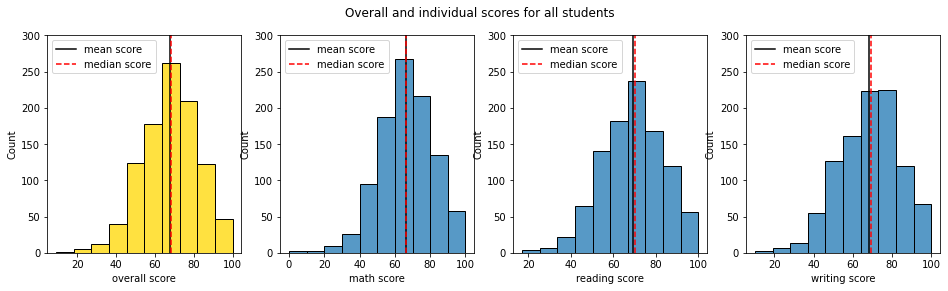

In [145]:
performance['overall score'] = performance[['math score', 'reading score', 'writing score']].mean(axis=1)

fig, ax = plt.subplots(1,4, figsize=(16,4))
sns.histplot(data=performance, x='overall score', bins=10, ax=ax[0], color='gold')
ax[0].set_ylim(0,300)
ax[0].axvline(performance['overall score'].mean(), color='black', label='mean score')
ax[0].axvline(performance['overall score'].median(), color='red', linestyle='dashed', label='median score')
ax[0].legend(loc='upper left')

sns.histplot(data=performance, x='math score', bins=10, ax=ax[1])
ax[1].set_ylim(0,300)
ax[1].axvline(performance['math score'].mean(), color='black', label='mean score')
ax[1].axvline(performance['math score'].median(), color='red', linestyle='dashed', label='median score')
ax[1].legend(loc='upper left')

sns.histplot(data=performance, x='reading score', bins=10, ax=ax[2])
ax[2].set_ylim(0,300)
ax[2].axvline(performance['reading score'].mean(), color='black', label='mean score')
ax[2].axvline(performance['reading score'].median(), color='red', linestyle='dashed', label='median score')
ax[2].legend(loc='upper left')

sns.histplot(data=performance, x='writing score', bins=10, ax=ax[3])
ax[3].set_ylim(0,300)
ax[3].axvline(performance['writing score'].mean(), color='black', label='mean score')
ax[3].axvline(performance['writing score'].median(), color='red', linestyle='dashed', label='median score')
ax[3].legend(loc='upper left')

plt.suptitle('Overall and individual scores for all students')

Text(0.5, 0.98, 'Overall and individual scores for female students')

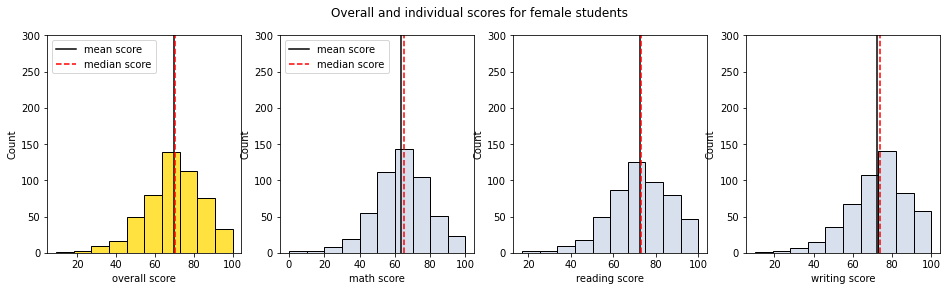

In [146]:
fig, ax = plt.subplots(1,4, figsize=(16,4))
sns.histplot(data=performance[performance["gender"]=='female'], x='overall score', bins=10, ax=ax[0], color='gold')
ax[0].set_ylim(0,300)
ax[0].axvline(performance.loc[performance['gender'] == 'female', 'overall score'].mean(), color='black', label='mean score')
ax[0].axvline(performance.loc[performance['gender'] == 'female', 'overall score'].median(), color='red', linestyle='dashed', label='median score')
ax[0].legend(loc='upper left')

sns.histplot(data=performance[performance["gender"]=='female'], x='math score', bins=10, ax=ax[1], color='#cbd5e8')
ax[1].set_ylim(0,300)
ax[1].axvline(performance.loc[performance['gender'] == 'female', 'math score'].mean(), color='black', label='mean score')
ax[1].axvline(performance.loc[performance['gender'] == 'female', 'math score'].median(), color='red', linestyle='dashed', label='median score')
ax[1].legend(loc='upper left')

sns.histplot(data=performance[performance["gender"]=='female'], x='reading score', bins=10, ax=ax[2], color='#cbd5e8')
ax[2].set_ylim(0,300)
ax[2].axvline(performance.loc[performance['gender'] == 'female', 'reading score'].mean(), color='black', label='mean score')
ax[2].axvline(performance.loc[performance['gender'] == 'female', 'reading score'].median(), color='red', linestyle='dashed', label='median score')

sns.histplot(data=performance[performance["gender"]=='female'], x='writing score', bins=10, ax=ax[3], color='#cbd5e8')
ax[3].set_ylim(0,300)
ax[3].axvline(performance.loc[performance['gender'] == 'female', 'writing score'].mean(), color='black', label='mean score')
ax[3].axvline(performance.loc[performance['gender'] == 'female', 'writing score'].median(), color='red', linestyle='dashed', label='median score')

plt.suptitle('Overall and individual scores for female students')

Text(0.5, 0.98, 'Overall and individual scores for male students')

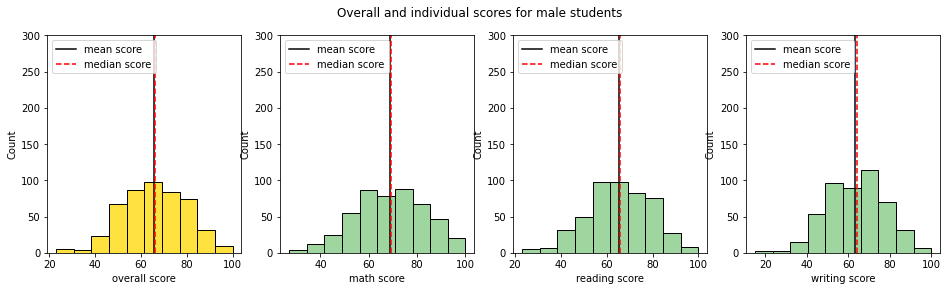

In [147]:
fig, ax = plt.subplots(1,4, figsize=(16,4))
sns.histplot(data=performance[performance["gender"]=='male'], x='overall score', bins=10, ax=ax[0], color='gold')
ax[0].set_ylim(0,300)
ax[0].axvline(performance.loc[performance['gender'] == 'male', 'overall score'].mean(), color='black', label='mean score')
ax[0].axvline(performance.loc[performance['gender'] == 'male', 'overall score'].median(), color='red', linestyle='dashed', label='median score')
ax[0].legend(loc='upper left')

sns.histplot(data=performance[performance["gender"]=='male'], x='math score', bins=10, ax=ax[1], color='#7fc97f')
ax[1].set_ylim(0,300)
ax[1].axvline(performance.loc[performance['gender'] == 'male', 'math score'].mean(), color='black', label='mean score')
ax[1].axvline(performance.loc[performance['gender'] == 'male', 'math score'].median(), color='red', linestyle='dashed', label='median score')
ax[1].legend(loc='upper left')

sns.histplot(data=performance[performance["gender"]=='male'], x='reading score', bins=10, ax=ax[2], color='#7fc97f')
ax[2].set_ylim(0,300)
ax[2].axvline(performance.loc[performance['gender'] == 'male', 'reading score'].mean(), color='black', label='mean score')
ax[2].axvline(performance.loc[performance['gender'] == 'male', 'reading score'].median(), color='red', linestyle='dashed', label='median score')
ax[2].legend(loc='upper left')

sns.histplot(data=performance[performance["gender"]=='male'], x='writing score', bins=10, ax=ax[3], color='#7fc97f')
ax[3].set_ylim(0,300)
ax[3].axvline(performance.loc[performance['gender'] == 'male', 'writing score'].mean(), color='black', label='mean score')
ax[3].axvline(performance.loc[performance['gender'] == 'male', 'writing score'].median(), color='red', linestyle='dashed', label='median score')
ax[3].legend(loc='upper left')

plt.suptitle('Overall and individual scores for male students')

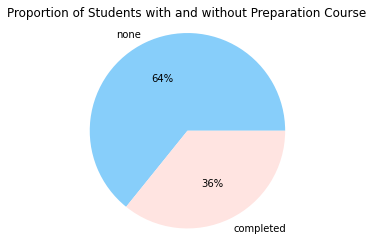

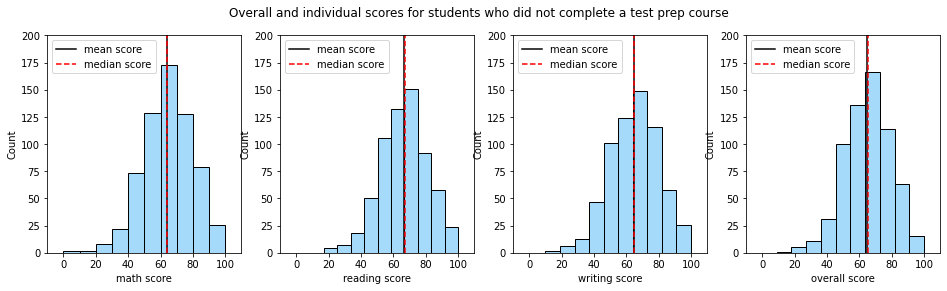

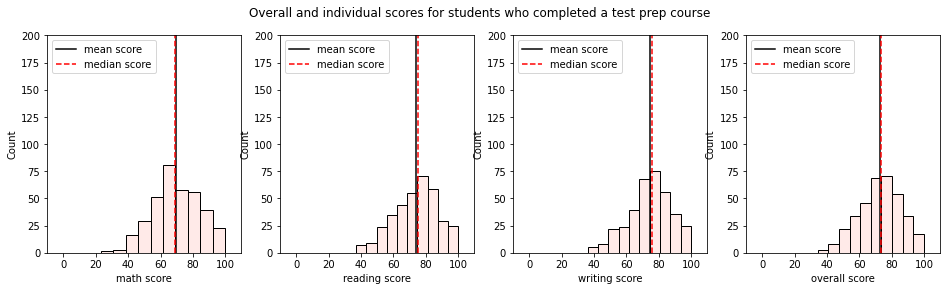

In [148]:
prep_course = performance['test preparation course'].value_counts()
labels = performance['test preparation course'].unique()
colors = ['lightskyblue', 'mistyrose']
plt.pie(prep_course, labels=labels, colors = colors, autopct='%.0f%%')
plt.axis('equal')
plt.title('Proportion of Students with and without Preparation Course')

fig, ax = plt.subplots(1,4, figsize=(16,4))
test_scores = list(performance.columns[-4:])

for i, test in enumerate(test_scores):
        sns.histplot(data=performance[performance["test preparation course"]=='none'], x=test, bins=10, ax=ax[i], color='lightskyblue')
        ax[i].set_xlim(-10,110)
        ax[i].set_ylim(0,200)
        ax[i].axvline(performance.loc[performance['test preparation course'] == 'none', test].mean(), color='black', label='mean score')
        ax[i].axvline(performance.loc[performance['test preparation course'] == 'none', test].median(), color='red', linestyle='dashed', label='median score')
        ax[i].legend(loc='upper left')
        plt.suptitle('Overall and individual scores for students who did not complete a test prep course', ha='center')

fig, ax = plt.subplots(1,4, figsize=(16,4))
test_scores = list(performance.columns[-4:])

for j, test in enumerate(test_scores):
        sns.histplot(data=performance[performance["test preparation course"]=='completed'], x=test, bins=10, ax=ax[j], color='mistyrose')
        ax[j].set_xlim(-10,110)
        ax[j].set_ylim(0,200)
        ax[j].axvline(performance.loc[performance['test preparation course'] =='completed', test].mean(), color='black', label='mean score')
        ax[j].axvline(performance.loc[performance['test preparation course'] =='completed', test].median(), color='red', linestyle='dashed', label='median score')
        ax[j].legend(loc='upper left')
        plt.suptitle('Overall and individual scores for students who completed a test prep course', ha='center')

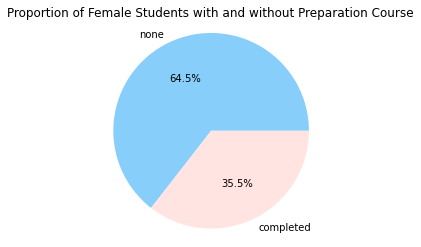

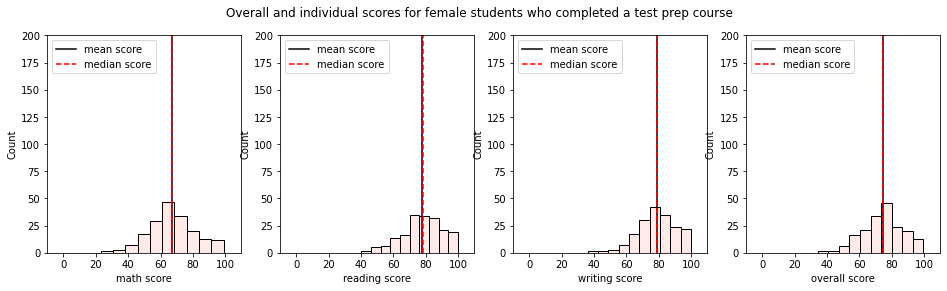

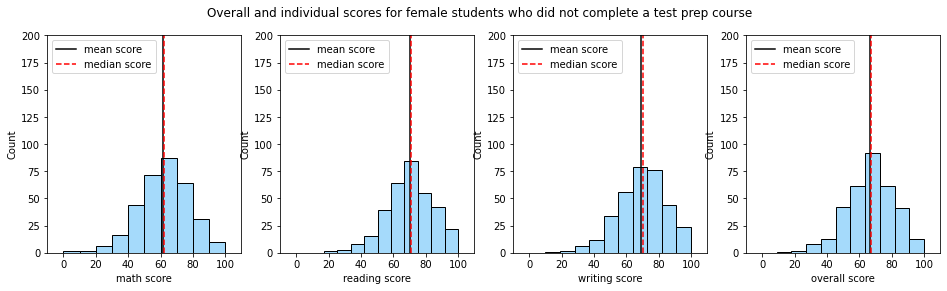

In [149]:
female_prep = performance[(performance['gender'] == 'female') & (performance['test preparation course'] == 'completed')]
female_no_prep = performance[(performance['gender'] == 'female') & (performance['test preparation course'] == 'none')]

# Count the number of students in each group
num_female_with_prep = len(female_prep)
num_female_no_prep = len(female_no_prep)

# Create data for the pie chart
labels = performance['test preparation course'].unique()
sizes = [num_female_no_prep, num_female_with_prep]
colors = ['lightskyblue', 'mistyrose']

# Plot the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Proportion of Female Students with and without Preparation Course')
plt.show()

fig, ax = plt.subplots(1,4, figsize=(16,4))

for i, test in enumerate(test_scores):
        sns.histplot(data=female_prep, x=test, bins=10, ax=ax[i], color='mistyrose')
        ax[i].set_xlim(-10,110)
        ax[i].set_ylim(0,200)
        ax[i].axvline(female_prep[test].mean(), color='black', label='mean score')
        ax[i].axvline(female_prep[test].median(), color='red', linestyle='dashed', label='median score')
        ax[i].legend(loc='upper left')
        plt.suptitle('Overall and individual scores for female students who completed a test prep course', ha='center')

fig, ax = plt.subplots(1,4, figsize=(16,4))
test_scores = list(performance.columns[-4:])

for j, test in enumerate(test_scores):
        sns.histplot(data=female_no_prep, x=test, bins=10, ax=ax[j], color='lightskyblue')
        ax[j].set_xlim(-10,110)
        ax[j].set_ylim(0,200)
        ax[j].axvline(female_no_prep[test].mean(), color='black', label='mean score')
        ax[j].axvline(female_no_prep[test].median(), color='red', linestyle='dashed', label='median score')
        ax[j].legend(loc='upper left')
        plt.suptitle('Overall and individual scores for female students who did not complete a test prep course', ha='center')

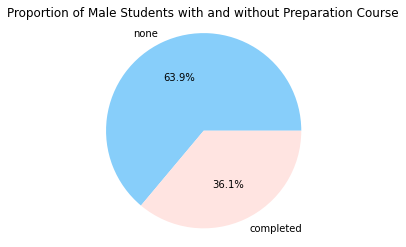

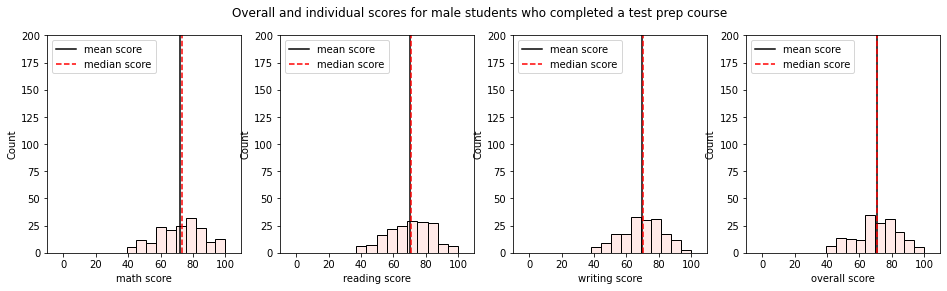

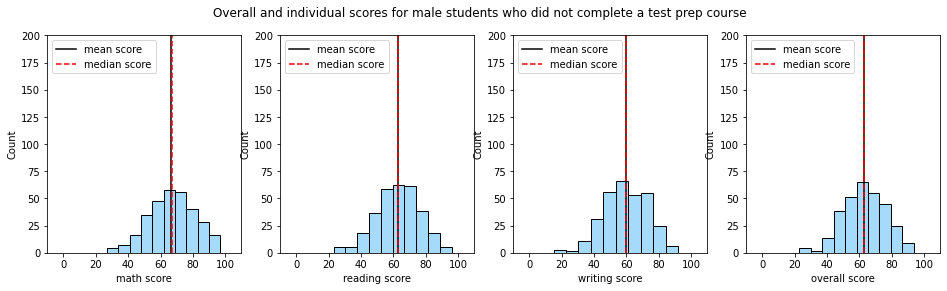

In [150]:
male_prep = performance[(performance['gender'] == 'male') & (performance['test preparation course'] == 'completed')]
male_no_prep = performance[(performance['gender'] == 'male') & (performance['test preparation course'] == 'none')]

# Count the number of students in each group
num_male_with_prep = len(male_prep)
num_male_no_prep = len(male_no_prep)

# Create data for the pie chart
labels = performance['test preparation course'].unique()
sizes = [num_male_no_prep, num_male_with_prep]
colors = ['lightskyblue', 'mistyrose']

# Plot the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Proportion of Male Students with and without Preparation Course')
plt.show()

fig, ax = plt.subplots(1,4, figsize=(16,4))

for i, test in enumerate(test_scores):
        sns.histplot(data=male_prep, x=test, bins=10, ax=ax[i], color='mistyrose')
        ax[i].set_xlim(-10,110)
        ax[i].set_ylim(0,200)
        ax[i].axvline(male_prep[test].mean(), color='black', label='mean score')
        ax[i].axvline(male_prep[test].median(), color='red', linestyle='dashed', label='median score')
        ax[i].legend(loc='upper left')
        plt.suptitle('Overall and individual scores for male students who completed a test prep course', ha='center')

fig, ax = plt.subplots(1,4, figsize=(16,4))
test_scores = list(performance.columns[-4:])

for j, test in enumerate(test_scores):
        sns.histplot(data=male_no_prep, x=test, bins=10, ax=ax[j], color='lightskyblue')
        ax[j].set_xlim(-10,110)
        ax[j].set_ylim(0,200)
        ax[j].axvline(male_no_prep[test].mean(), color='black', label='mean score')
        ax[j].axvline(male_no_prep[test].median(), color='red', linestyle='dashed', label='median score')
        ax[j].legend(loc='upper left')
        plt.suptitle('Overall and individual scores for male students who did not complete a test prep course', ha='center')

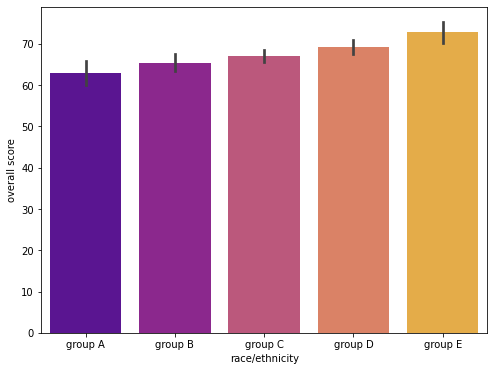

In [151]:
plt.figure(figsize=(8, 6))
sns.barplot(data=performance, x='race/ethnicity', y='overall score', palette='plasma')
plt.show()

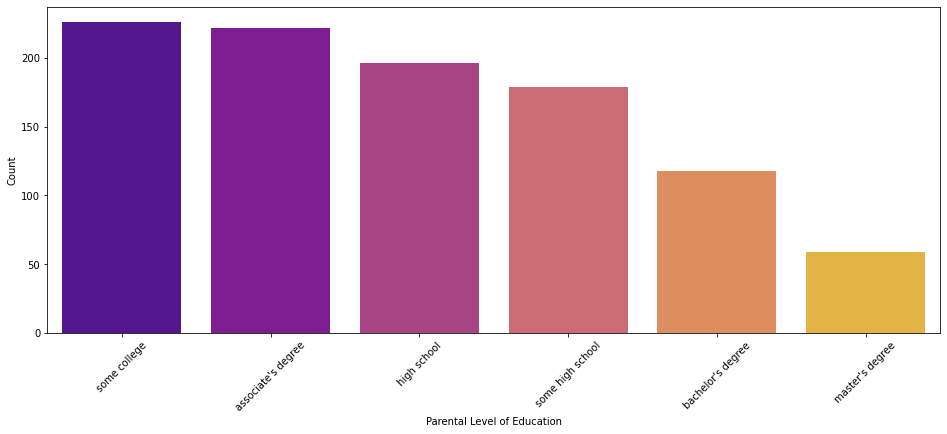

In [152]:
value_counts = performance.groupby(['parental level of education']).size().reset_index(name='count')

# Sort values in descending order by the 'count' column
value_counts = value_counts.sort_values(by='count', ascending=False)

# Create the bar plot with explicit 'x' parameter
plt.figure(figsize=(16, 6))
sns.barplot(data=value_counts, x='parental level of education', y='count', palette='plasma', order=value_counts['parental level of education'])
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

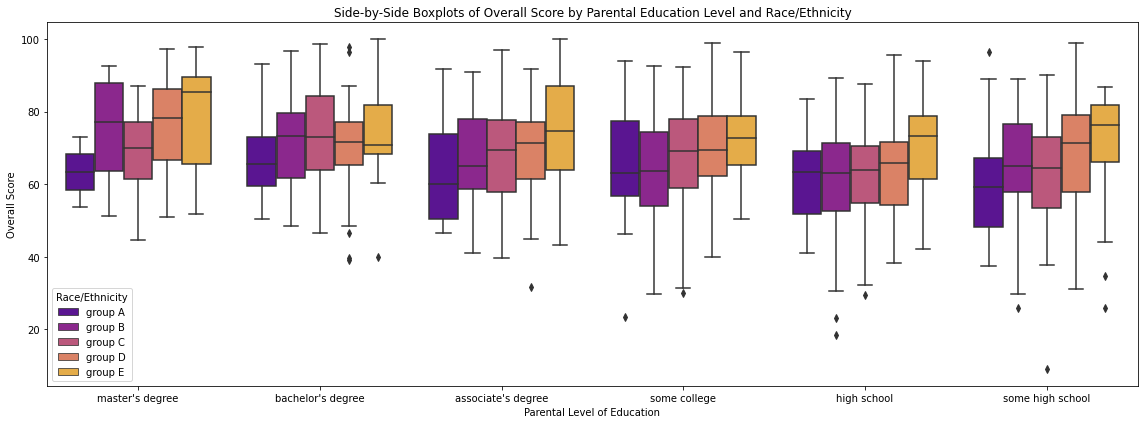

In [153]:
group_a = performance[performance['race/ethnicity'] == 'group A']
group_b = performance[performance['race/ethnicity'] == 'group B']
group_c = performance[performance['race/ethnicity'] == 'group C']
group_d = performance[performance['race/ethnicity'] == 'group D']
group_e = performance[performance['race/ethnicity'] == 'group E']


groups = pd.concat([group_a, group_b, group_c, group_d, group_e], axis=0)
parents_education = ['master\'s degree', 'bachelor\'s degree', 'associate\'s degree', 'some college', 'high school', 'some high school']

plt.figure(figsize=(16, 6))
sns.boxplot(data=groups, x='parental level of education', y='overall score', hue='race/ethnicity', palette='plasma', order=parents_education)

# Customize the plot
plt.xlabel('Parental Level of Education')
plt.ylabel('Overall Score')
plt.title('Side-by-Side Boxplots of Overall Score by Parental Education Level and Race/Ethnicity')

# Display the plot
plt.legend(title='Race/Ethnicity', loc='lower left')
plt.tight_layout()
plt.show()

In [154]:
print(groups.value_counts())

gender  race/ethnicity  parental level of education  lunch         test preparation course  math score  reading score  writing score  overall score
female  group A         associate's degree           free/reduced  none                     37          57             56             50.000000        1
male    group C         associate's degree           standard      completed                57          54             56             55.666667        1
                                                     free/reduced  completed                60          51             56             55.666667        1
                                                                                            65          67             65             65.666667        1
                                                                                                        73             68             68.666667        1
                                                                                       

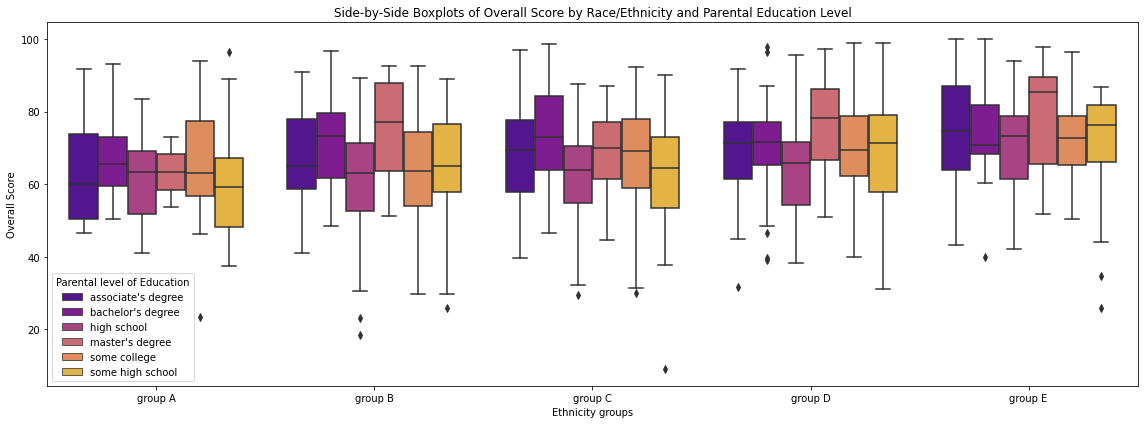

In [155]:
masters = performance[performance['parental level of education'] == 'master\'s degree']
bachelors = performance[performance['parental level of education'] == 'bachelor\'s degree']
associates = performance[performance['parental level of education'] == 'associate\'s degree']
some_college = performance[performance['parental level of education'] == 'some college']
high_school = performance[performance['parental level of education'] == 'high school']
some_high_school = performance[performance['parental level of education'] == 'some high school']


parent_groups = pd.concat([masters, bachelors, associates, some_college, high_school, some_high_school], axis=0)
groups_list = ['group A', 'group B', 'group C', 'group D', 'group E']

plt.figure(figsize=(16, 6))
sns.boxplot(data=parent_groups, x='race/ethnicity', y='overall score', hue='parental level of education', palette='plasma', order=groups_list)

# Customize the plot
plt.xlabel('Ethnicity groups')
plt.ylabel('Overall Score')
plt.title('Side-by-Side Boxplots of Overall Score by Race/Ethnicity and Parental Education Level')

# Display the plot
plt.legend(title='Parental level of Education', loc='lower left')
plt.tight_layout()
plt.show()

In [156]:
print(parent_groups[(parent_groups['parental level of education'] == 'associate\'s degree') & (parent_groups['race/ethnicity'] == 'group A')].value_counts())

gender  race/ethnicity  parental level of education  lunch         test preparation course  math score  reading score  writing score  overall score
female  group A         associate's degree           free/reduced  none                     37          57             56             50.000000        1
                                                                                            41          51             48             46.666667        1
                                                                                            65          85             76             75.333333        1
                                                     standard      completed                55          65             62             60.666667        1
                                                                                            65          70             74             69.666667        1
                                                                   none                

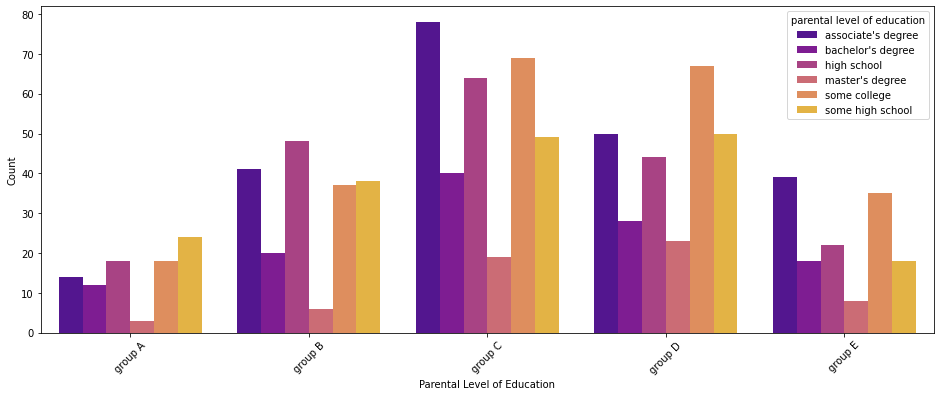

In [157]:
value_counts = performance.groupby(['parental level of education', 'race/ethnicity']).size().reset_index(name='count')

plt.figure(figsize=(16, 6))
sns.barplot(data=value_counts, x='race/ethnicity', y='count', hue='parental level of education', palette='plasma')
plt.xlabel('Parental Level of Education')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [158]:
performance_dummies = pd.get_dummies(performance, prefix='to_num_')
print(performance_dummies)

     math score  reading score  writing score  overall score  to_num__female  \
0            72             72             74      72.666667               1   
1            69             90             88      82.333333               1   
2            90             95             93      92.666667               1   
3            47             57             44      49.333333               0   
4            76             78             75      76.333333               0   
..          ...            ...            ...            ...             ...   
995          88             99             95      94.000000               1   
996          62             55             55      57.333333               0   
997          59             71             65      65.000000               1   
998          68             78             77      74.333333               1   
999          77             86             86      83.000000               1   

     to_num__male  to_num__group A  to_

In [159]:
correlation_matrix = performance_dummies.corr()

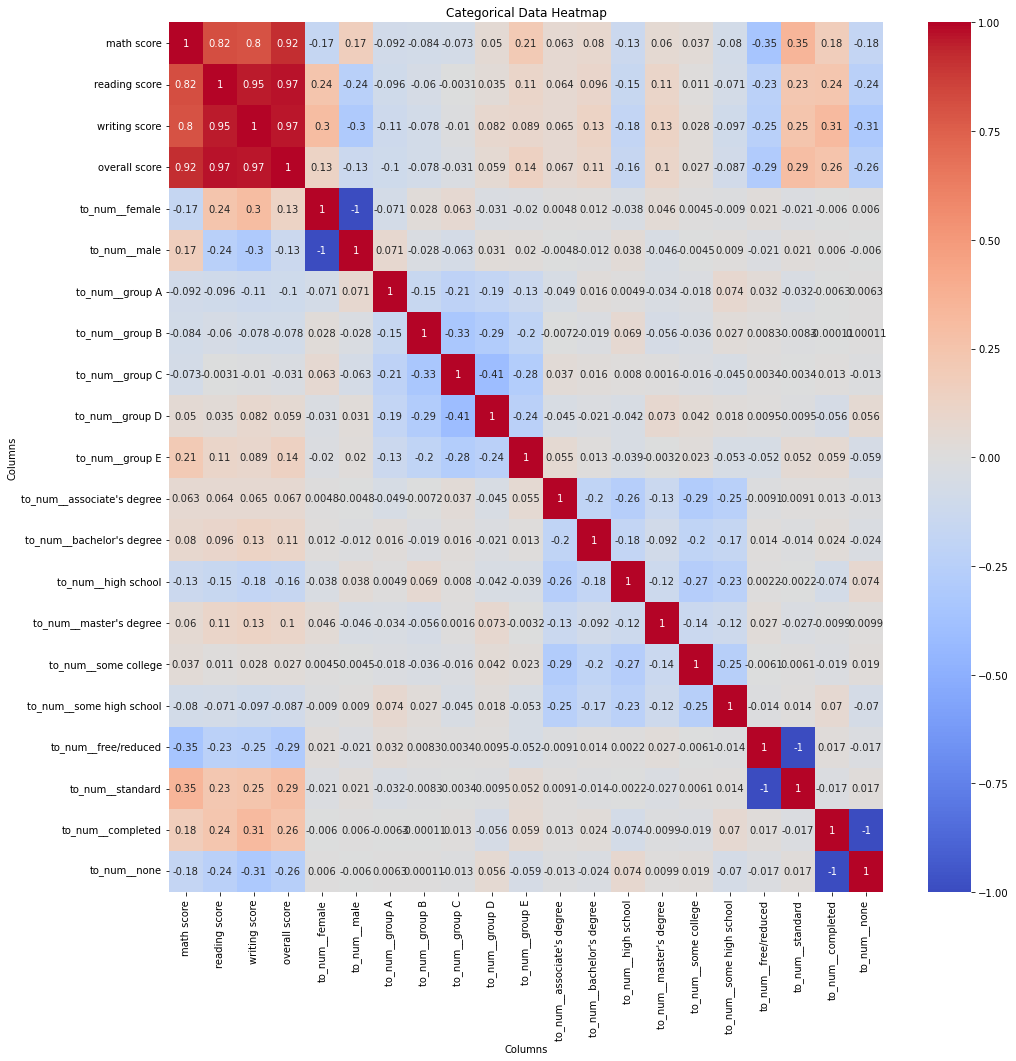

In [160]:
plt.figure(figsize=(16, 16))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Set labels and title
plt.xlabel("Columns")
plt.ylabel("Columns")
plt.title("Categorical Data Heatmap")

# Show the heatmap
plt.show()

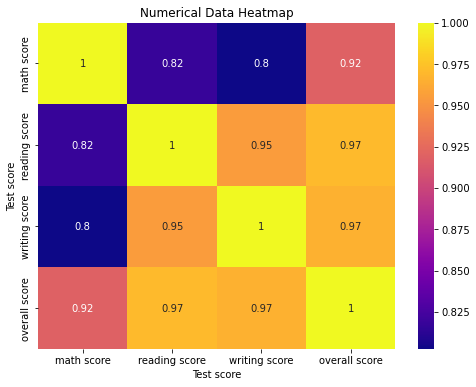

In [161]:
correlation = performance.corr()
plt.figure(figsize=(8, 6))

# Create the heatmap
sns.heatmap(correlation, annot=True, cmap="plasma")

# Set labels and title
plt.xlabel("Test score")
plt.ylabel("Test score")
plt.title("Numerical Data Heatmap")

# Show the heatmap
plt.show()

In [162]:
print(performance['race/ethnicity'].dtype)
print(performance['parental level of education'].dtype)

category
category


In [163]:
performance['race/ethnicity_OHE'] = performance['race/ethnicity'].cat.codes 
performance['parental level of education_OHE'] = performance['parental level of education'].cat.codes 
  
  
# Create an instance of One-hot-encoder 
enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = pd.DataFrame(enc.fit_transform(performance[['race/ethnicity_OHE', 'parental level of education_OHE']]).toarray()) 
  
# Merge with main 
performance_OHE = performance.join(enc_data) 
  
print(performance_OHE.columns) 


Index([                         'gender',                  'race/ethnicity',
           'parental level of education',                           'lunch',
               'test preparation course',                      'math score',
                         'reading score',                   'writing score',
                         'overall score',              'race/ethnicity_OHE',
       'parental level of education_OHE',                                 0,
                                       1,                                 2,
                                       3,                                 4,
                                       5,                                 6,
                                       7,                                 8,
                                       9,                                10],
      dtype='object')


In [164]:
X = performance_OHE[['race/ethnicity_OHE', 'parental level of education_OHE']]  # Independent variables
y = performance['overall score']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

coefficients = model.coef_
intercept = model.intercept_

print("Intercept (beta_0):", intercept)
print("Coefficients (beta_1, beta_2):", coefficients)

Mean Absolute Error: 11.22731574609101
Mean Squared Error: 207.9919393829084
R-squared: 0.029737040541730653
Intercept (beta_0): 64.83640963444051
Coefficients (beta_1, beta_2): [ 2.15988103 -0.55816413]


Mean Squared Error: 32.63929009088881
R-squared: 0.847740762011448


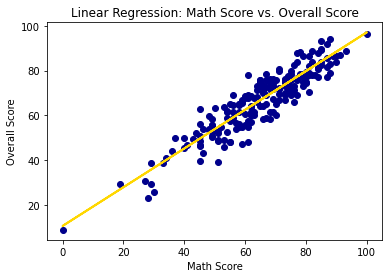

In [170]:
X = performance[['math score']]
y = performance['overall score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.scatter(X_test['math score'], y_test, color='darkblue')
plt.plot(X_test['math score'], y_pred, color='gold', linewidth=2)
plt.xlabel('Math Score')
plt.ylabel('Overall Score')
plt.title('Linear Regression: Math Score vs. Overall Score')
plt.show()

Mean Squared Error: 12.224195613768424
R-squared: 0.9429752698667014


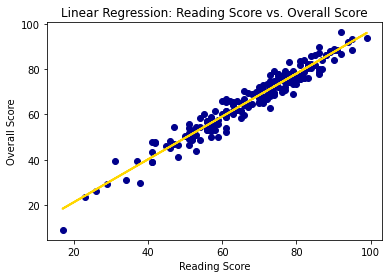

In [169]:
X = performance[['reading score']]
y = performance['overall score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.scatter(X_test['reading score'], y_test, color='darkblue')
plt.plot(X_test['reading score'], y_pred, color='gold', linewidth=2)
plt.xlabel('Reading Score')
plt.ylabel('Overall Score')
plt.title('Linear Regression: Reading Score vs. Overall Score')
plt.show()

Mean Squared Error: 15.60142676127758
R-squared: 0.9272208021806996


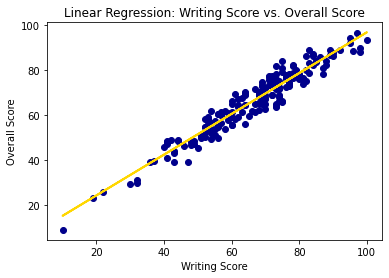

In [171]:
X = performance[['writing score']]
y = performance['overall score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.scatter(X_test['writing score'], y_test, color='darkblue')
plt.plot(X_test['writing score'], y_pred, color='gold', linewidth=2)
plt.xlabel('Writing Score')
plt.ylabel('Overall Score')
plt.title('Linear Regression: Writing Score vs. Overall Score')
plt.show()